# 목차
- [Pandas로 데이터 읽어오기](#Pandas로-데이터-읽어오기)
- [Pandas 기초 (1)](#Pandas_기초_(1))
- [Pandas 이용한 CCTV와 인구 현황 파악](#Pandas_이용한_CCTV와_인구_현황_파악)
- [Pandas 기초 (2)](#Pandas_기초_(2))
- [CCTV 데이터와 인구 데이터 병합하고 분석하기](#CCTV_데이터와_인구_데이터_병합하고_분석하기)
- [Matplotlib 기초](#Matplotlib_기초)
- [CCTV와 인구현황 그래프로 분석하기](#CCTV와_인구현황_그래프로_분석하기)
- [조금 더 설득력 있는 자료 만들기](#조금_더_설득력_있는_자료_만들기)

# Pandas로 데이터 읽어오기

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv',  encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [7]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# Pandas 기초 (1)

In [9]:
import numpy as np

In [10]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [11]:
dates = pd.date_range('20210808', periods=6)
dates

DatetimeIndex(['2021-08-08', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randint(10000, size=(6,4)), index=dates, columns=(['A','B','C','D']))
df

,A,B,C,D
2021-08-08,7290,6190,6707,8554
2021-08-09,7763,4984,2790,9484
2021-08-10,424,13,7859,3436
2021-08-11,551,3796,3259,2323
2021-08-12,6115,2636,7376,1213
2021-08-13,256,7132,2782,2706


In [13]:
df.head(3) #head는 앞에 몇개를 보여주라는 명령, default = 5

,A,B,C,D
2021-08-08,7290,6190,6707,8554
2021-08-09,7763,4984,2790,9484
2021-08-10,424,13,7859,3436


In [14]:
df.index

DatetimeIndex(['2021-08-08', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[7290, 6190, 6707, 8554],
       [7763, 4984, 2790, 9484],
       [ 424,   13, 7859, 3436],
       [ 551, 3796, 3259, 2323],
       [6115, 2636, 7376, 1213],
       [ 256, 7132, 2782, 2706]])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-08-08 to 2021-08-13
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       6 non-null      int64
 1   B       6 non-null      int64
 2   C       6 non-null      int64
 3   D       6 non-null      int64
dtypes: int64(4)
memory usage: 240.0 bytes


In [18]:
df.describe() # 통계적 요소 확인

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,3733.166667,4125.166667,5128.833333,4619.333333
std,3680.521888,2579.847315,2427.682963,3495.252761
min,256.000000,13.000000,2782.000000,1213.000000
25%,455.750000,2926.000000,2907.250000,2418.750000
50%,3333.000000,4390.000000,4983.000000,3071.000000
75%,6996.250000,5888.500000,7208.750000,7274.500000
max,7763.000000,7132.000000,7859.000000,9484.000000


In [19]:
df.sort_values(by='B',ascending=False)

,A,B,C,D
2021-08-13,256,7132,2782,2706
2021-08-08,7290,6190,6707,8554
2021-08-09,7763,4984,2790,9484
2021-08-11,551,3796,3259,2323
2021-08-12,6115,2636,7376,1213
2021-08-10,424,13,7859,3436


In [20]:
df

,A,B,C,D
2021-08-08,7290,6190,6707,8554
2021-08-09,7763,4984,2790,9484
2021-08-10,424,13,7859,3436
2021-08-11,551,3796,3259,2323
2021-08-12,6115,2636,7376,1213
2021-08-13,256,7132,2782,2706


In [21]:
df[:3]

,A,B,C,D
2021-08-08,7290,6190,6707,8554
2021-08-09,7763,4984,2790,9484
2021-08-10,424,13,7859,3436


In [22]:
df['20210814':'20210818'] # 범위에 없어도 없다고 나오지 에러 아님 (값이 없을 뿐)

,A,B,C,D


In [23]:
df.loc[dates[0]] #특정 행의 값만 보는 것도 가능

A    7290
B    6190
C    6707
D    8554
Name: 2021-08-08 00:00:00, dtype: int64

In [24]:
df.loc[:,['A','C']]

,A,C
2021-08-08,7290,6707
2021-08-09,7763,2790
2021-08-10,424,7859
2021-08-11,551,3259
2021-08-12,6115,7376
2021-08-13,256,2782


In [25]:
df.loc[['20210808', '20210810'],['A','C']]

,A,C
2021-08-08,7290,6707
2021-08-10,424,7859


In [26]:
df.loc[dates[0],'A']

7290

In [27]:
df.iloc[3] # loc와 다른 점은 index를 활용

A     551
B    3796
C    3259
D    2323
Name: 2021-08-11 00:00:00, dtype: int64

In [28]:
df.iloc[[1,2,4],[0,2]]

,A,C
2021-08-09,7763,2790
2021-08-10,424,7859
2021-08-12,6115,7376


In [29]:
df.iloc[1:3,:]

,A,B,C,D
2021-08-09,7763,4984,2790,9484
2021-08-10,424,13,7859,3436


In [30]:
df

,A,B,C,D
2021-08-08,7290,6190,6707,8554
2021-08-09,7763,4984,2790,9484
2021-08-10,424,13,7859,3436
2021-08-11,551,3796,3259,2323
2021-08-12,6115,2636,7376,1213
2021-08-13,256,7132,2782,2706


In [31]:
df[df.A > 5000] # 특정 컬럼에서만

,A,B,C,D
2021-08-08,7290,6190,6707,8554
2021-08-09,7763,4984,2790,9484
2021-08-12,6115,2636,7376,1213


In [32]:
df[df > 5000] # 전체에 대해서는 만족하지 않는 것은 NaN(Not a Number) 처리

,A,B,C,D
2021-08-08,7290.0,6190.0,6707.0,8554.0
2021-08-09,7763.0,NaN,NaN,9484.0
2021-08-10,NaN,NaN,7859.0,NaN
2021-08-11,NaN,NaN,NaN,NaN
2021-08-12,6115.0,NaN,7376.0,NaN
2021-08-13,NaN,7132.0,NaN,NaN


In [33]:
df2 = df.copy() # 복사할 때, 이렇게! df2=df 라고 하면, 원본은 하나(위치만 복사 됨)

In [34]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2021-08-08,7290,6190,6707,8554,one
2021-08-09,7763,4984,2790,9484,one
2021-08-10,424,13,7859,3436,two
2021-08-11,551,3796,3259,2323,three
2021-08-12,6115,2636,7376,1213,four
2021-08-13,256,7132,2782,2706,three


In [35]:

df2['E'].isin(['two','four'])

2021-08-08    False
2021-08-09    False
2021-08-10     True
2021-08-11    False
2021-08-12     True
2021-08-13    False
Freq: D, Name: E, dtype: bool

In [36]:

df2[df2['E'].isin(['two','four'])] # isin을 이용하면 T/F가 반환되므로 조건에 맞는 데어터 선택가능

,A,B,C,D,E
2021-08-10,424,13,7859,3436,two
2021-08-12,6115,2636,7376,1213,four


In [37]:
df

,A,B,C,D
2021-08-08,7290,6190,6707,8554
2021-08-09,7763,4984,2790,9484
2021-08-10,424,13,7859,3436
2021-08-11,551,3796,3259,2323
2021-08-12,6115,2636,7376,1213
2021-08-13,256,7132,2782,2706


In [38]:
df.apply(np.cumsum) # 누적합 구하기

,A,B,C,D
2021-08-08,7290,6190,6707,8554
2021-08-09,15053,11174,9497,18038
2021-08-10,15477,11187,17356,21474
2021-08-11,16028,14983,20615,23797
2021-08-12,22143,17619,27991,25010
2021-08-13,22399,24751,30773,27716


In [39]:
df.apply(lambda x: x.max() - x.min()) # 람다 함수도 이용가능!

A    7507
B    7119
C    5077
D    8271
dtype: int64

# Pandas 이용한 CCTV와 인구 현황 파악

In [40]:
CCTV_Seoul.sort_values(by='소계').head() # 오름차순 정리

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [41]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head() # 내림차순 정리

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [42]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [43]:
pop_Seoul.head() # 0번 행의 합계는 필요없음

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [44]:
pop_Seoul.drop([0], inplace=True) # 0번 행 삭제
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [45]:
pop_Seoul['구별'].unique() #nan이 보임

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [46]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [47]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [48]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100 # 외국인 비율 계산
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100 # 고령자 비율 계산
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [49]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# Pandas 기초 (2)

## 연습용 데이터

In [50]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [51]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

## DataFrame 병합하기

In [52]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [53]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [54]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [55]:
result = pd.concat([df1,df2,df3]) # 단순히 열 방향으로 병합
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [56]:
result.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [57]:
result = pd.concat([df1,df2,df3], keys=['x','y','z']) # key옵션을 사용하면 다중 index가 되어 level을 형성
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [58]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [59]:


result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [60]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [61]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)
print(df4) # 마지막만 실행되니까 print로 실행
result

    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [62]:
result = pd.concat([df1, df4], axis=1, join='inner') # join옵션을 inner로 하면 겹치는 부분만
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [63]:
result1 = pd.concat([df1, df4])
result2 = pd.concat([df1, df4], ignore_index=True) # 합치고 index를 재부여
print(result1)
result2

     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
2  NaN  B2  NaN  D2   F2
3  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [64]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [65]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [66]:
pd.merge(left, right, on='key') # 공통된 key에 대해서만 병합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [67]:
pd.merge(left, right, how='left', on='key') # how옵션으로 기준을 설정

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [68]:
pd.merge(left, right, how='outer', on='key') # how옵션에 'outer'과 'cross'도 있음/ default = 'inner'

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [69]:
pd.merge(left, right, how='cross')

,key_x,A,B,key_y,C,D
0,K0,A0,B0,K0,C0,D0
1,K0,A0,B0,K1,C1,D1
2,K0,A0,B0,K2,C2,D2
3,K0,A0,B0,K3,C3,D3
4,K4,A1,B1,K0,C0,D0
5,K4,A1,B1,K1,C1,D1
6,K4,A1,B1,K2,C2,D2
7,K4,A1,B1,K3,C3,D3
8,K2,A2,B2,K0,C0,D0
9,K2,A2,B2,K1,C1,D1


# CCTV 데이터와 인구 데이터 병합하고 분석하기

In [70]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [71]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [72]:
data_result.set_index('구별', inplace=True) # index를 '구별'로 설정
print(data_result.index)
data_result.head()

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구별')


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [73]:
np.corrcoef(data_result['고령자비율'],data_result['소계']) # 상관계수를 알아보는 numpy의 함수 0.1 이하 - 거의 무시 / 0.3 이하 - 약한 상관관계 / 0.7 이하 - 뚜렷한 상관관계

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [74]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [75]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

# Matplotlib 기초

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

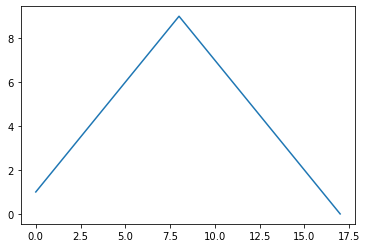

In [77]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

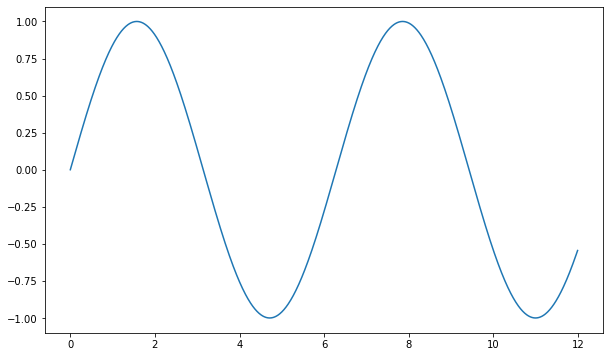

In [78]:
t = np.arange(0,12,0.01)
y = np.sin(t)
plt.figure(figsize=(10,6)) 
plt.plot(t, y)
plt.show()

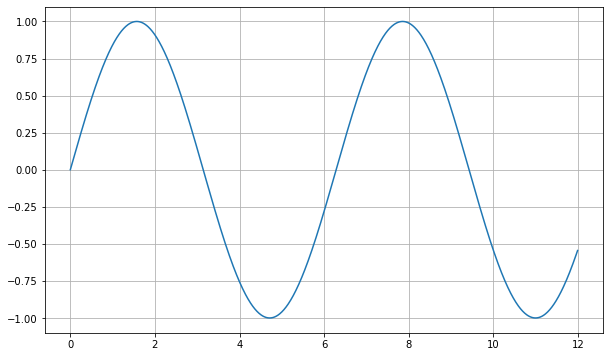

In [79]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기
plt.show()

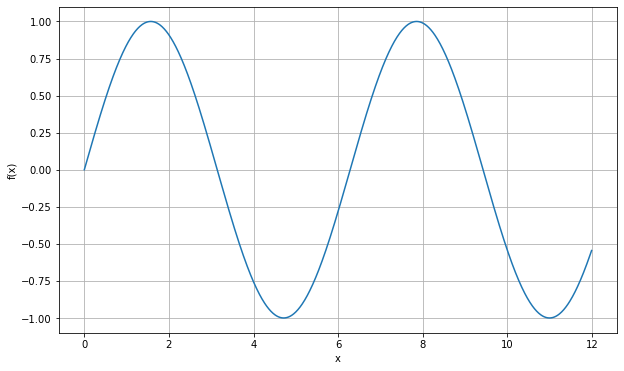

In [80]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('x')     # x축 라벨 적용하기
plt.ylabel('f(x)')  # y축 라벨 적용하기
plt.show()

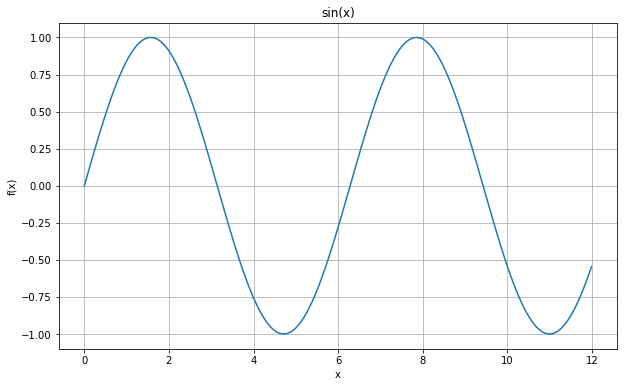

In [81]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('sin(x)') # 그래프 이름
plt.show()

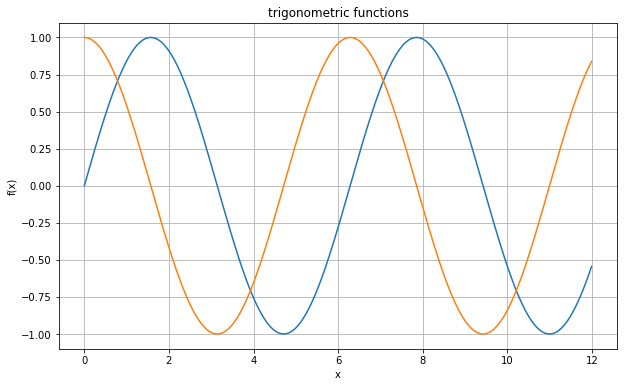

In [82]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('trigonometric functions')
plt.show()

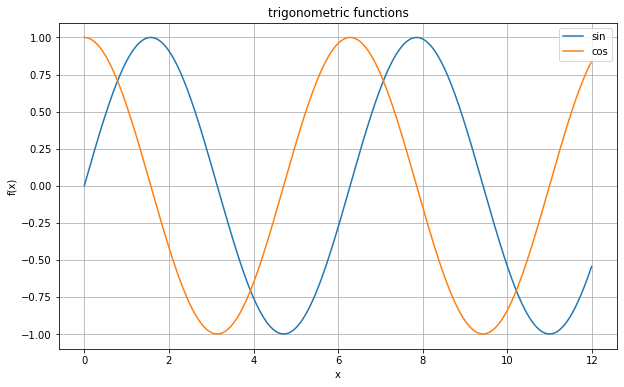

In [83]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('trigonometric functions')
plt.show()

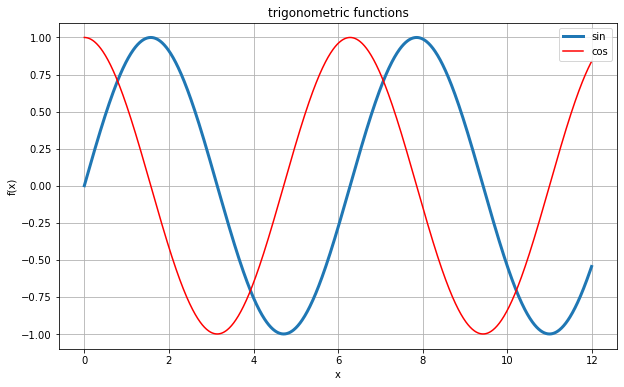

In [84]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin') # lw 선굵기
plt.plot(t, np.cos(t), 'r', label='cos')  # 색상
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('trigonometric functions')
plt.show()

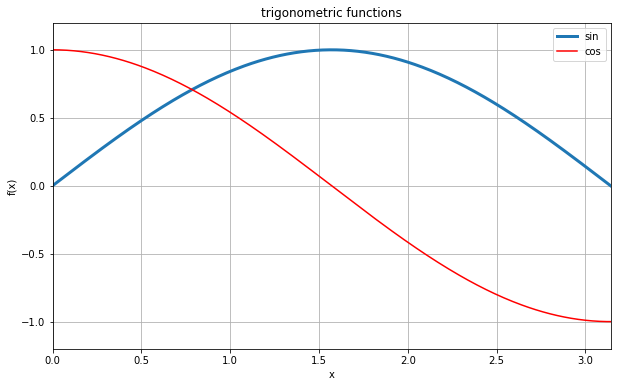

In [85]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin') # lw 선굵기
plt.plot(t, np.cos(t), 'r', label='cos')  # 색상
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('trigonometric functions')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi) #set the x limits of the current axes.
plt.show()

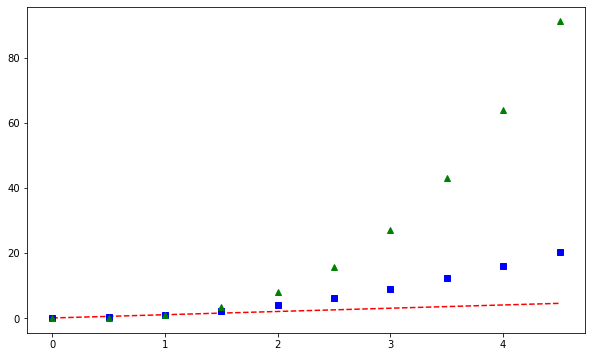

In [86]:
t = np.arange(0, 5, 0.5)
# default 'b-'외에 종류 많음! —, -., :, ,, ^, <, >, v, o, p, h, H, +, x, D, d, |, *, 1, 2, 3, 4, 등이 있음
# b(blue), g(green), r(red), c(cyan), m(magenta), y(yellow), k(black), w(white) 등이 있음
plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

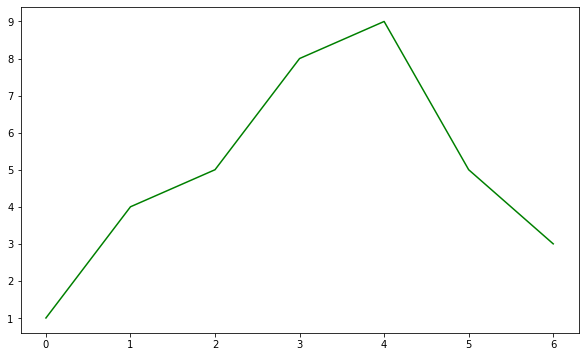

In [87]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

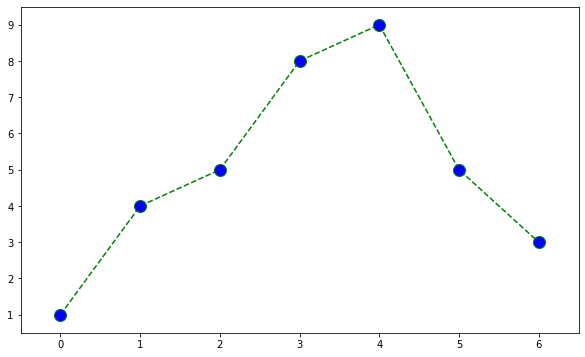

In [88]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', ms=12) # ms = markersize

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [89]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

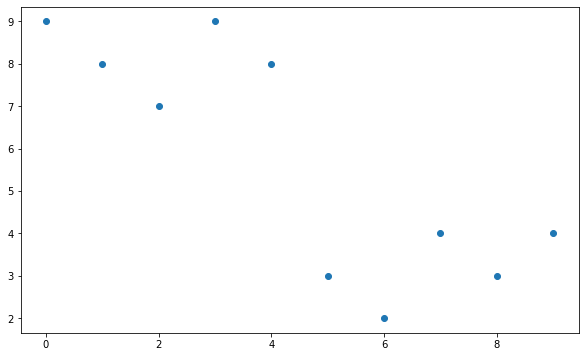

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

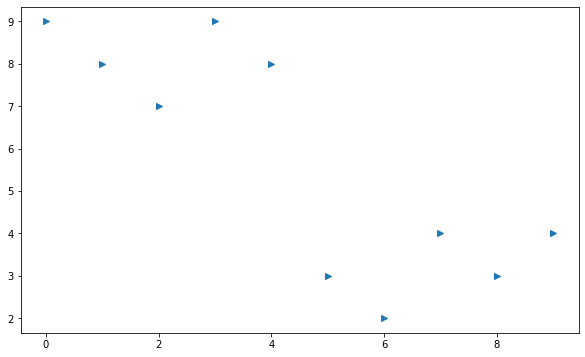

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

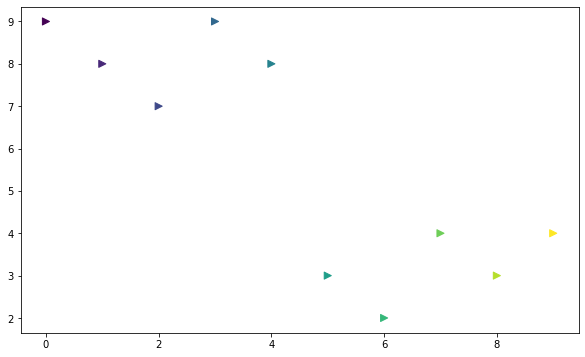

In [92]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

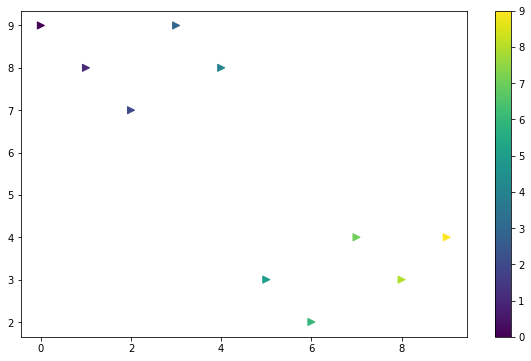

In [93]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [94]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

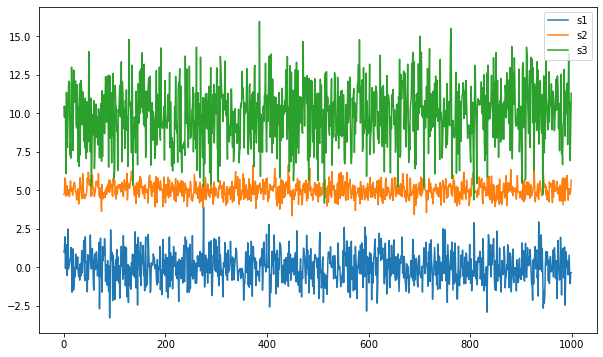

In [95]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

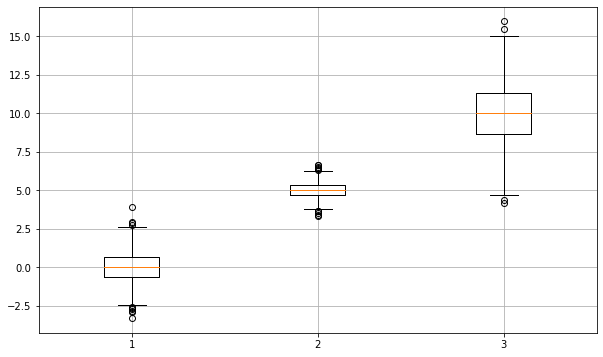

In [96]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

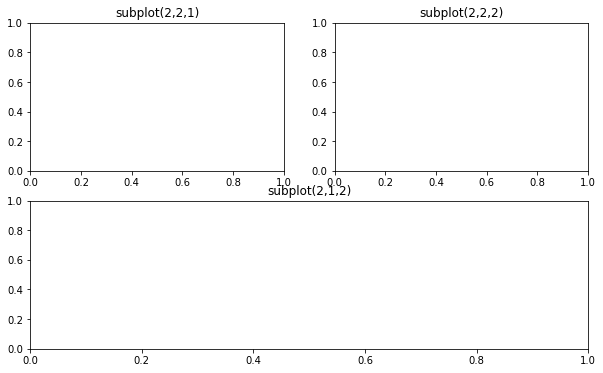

In [97]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.title('subplot(2,2,1)')
plt.subplot(222)
plt.title('subplot(2,2,2)')
plt.subplot(212)
plt.title('subplot(2,1,2)')

plt.show()

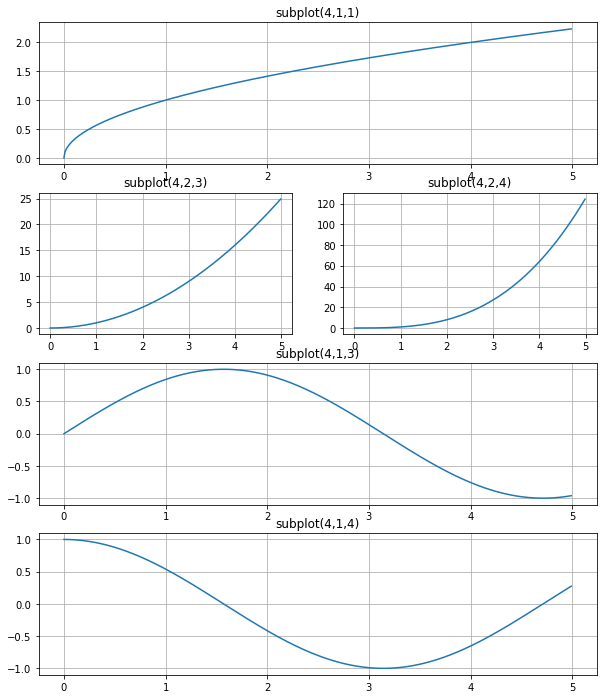

In [98]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.title('subplot(4,1,1)')
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.title('subplot(4,2,3)')
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.title('subplot(4,2,4)')
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.title('subplot(4,1,3)')
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.title('subplot(4,1,4)')
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# CCTV와 인구현황 그래프로 분석하기

In [99]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


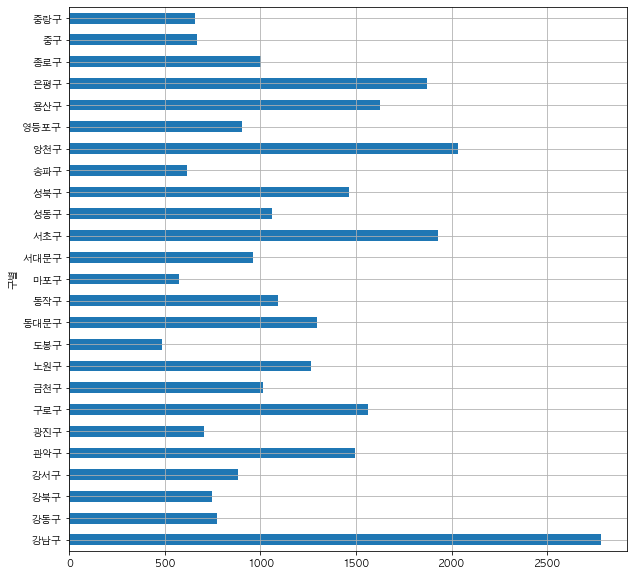

In [100]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10)) # 'barh': 수평바
plt.show()

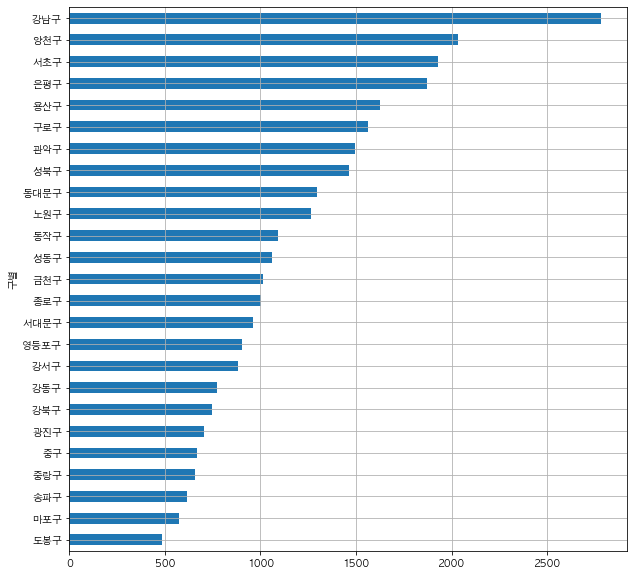

In [101]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

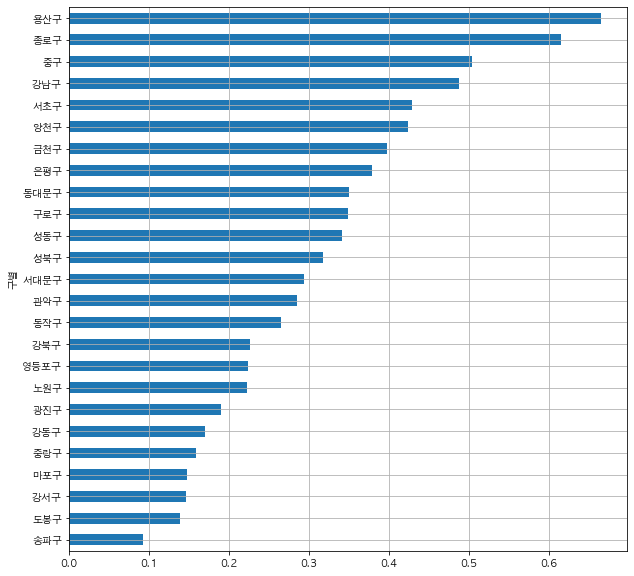

In [102]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

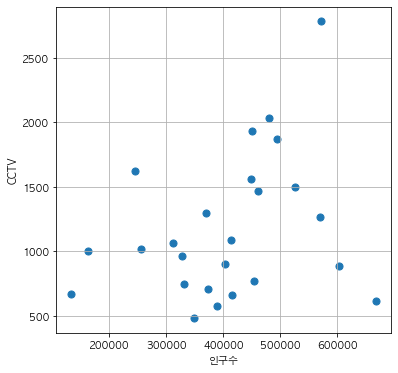

In [103]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [104]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [105]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 조금 더 설득력 있는 자료 만들기

In [106]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


In [107]:
df_sort.to_csv('../data/01. CCTV_result.csv', sep=',', encoding='utf-8')

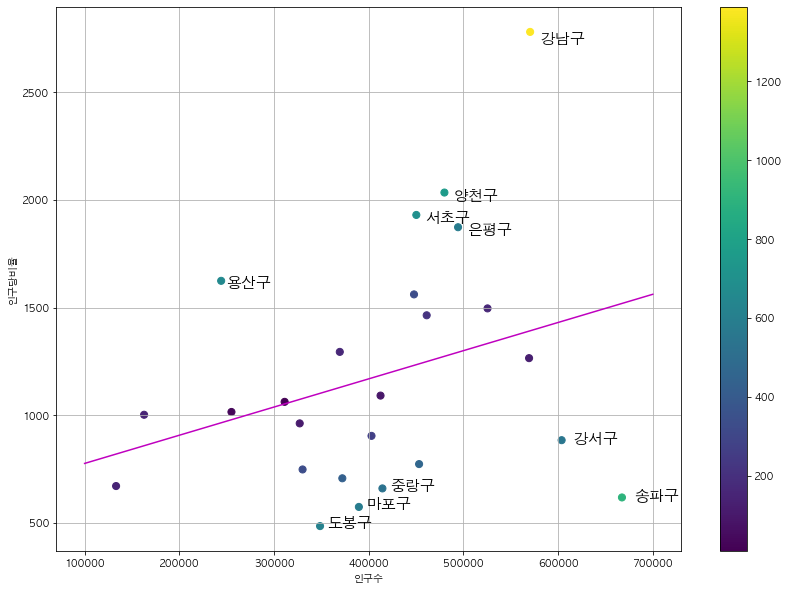

In [108]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), 'm-')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()